In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("insurance.csv")

## Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Feature Engineering

In [24]:
#since smoker and age are not numerical data so we must convert them to numerical in order to pass it to the model

In [25]:
male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df , male],axis =1)

In [26]:
df

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [27]:
smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df,smoker],axis = 1)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [29]:
df = df.rename(columns = {'yes':'Smoker'})

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [31]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory Analysis

In [39]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

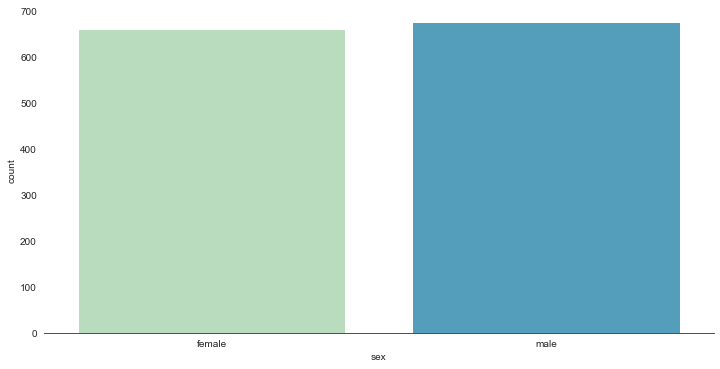

In [36]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex',data=df,palette='GnBu')
sns.despine(left = True)

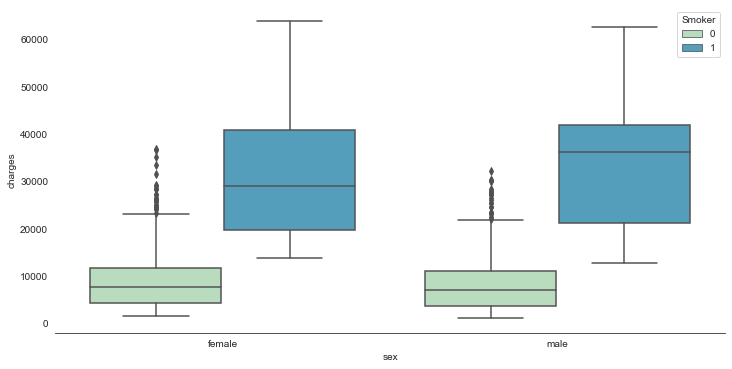

In [38]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex',y='charges',data=df,palette='GnBu',hue = 'Smoker')
sns.despine(left = True)

In [ ]:
# the above graph shows if a person is smoking then the chance of getting more chrages is high for both male and female 

<AxesSubplot:xlabel='age', ylabel='charges'>

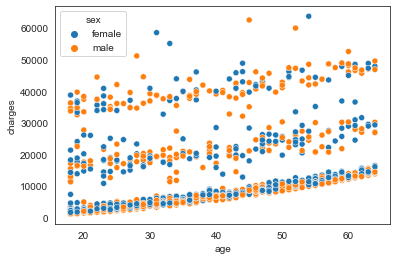

In [41]:
sns.scatterplot(x='age', y='charges', data=df, hue='sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

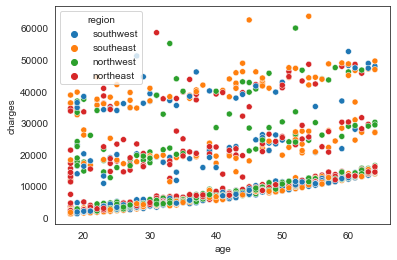

In [42]:
sns.scatterplot(x='age', y='charges', data = df, hue='region')

<AxesSubplot:xlabel='age', ylabel='charges'>

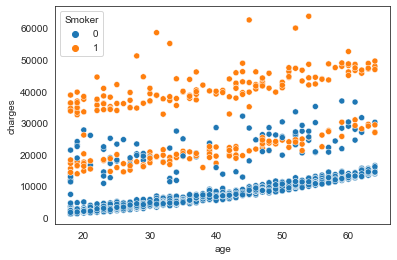

In [43]:
sns.scatterplot(x='age', y='charges', data = df, hue='Smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

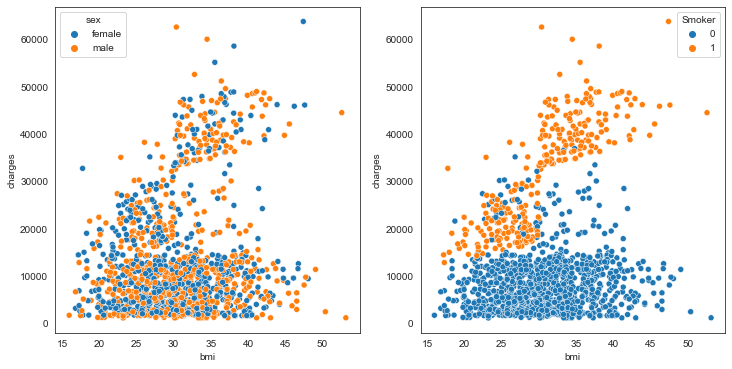

In [46]:
fig, ax=plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
sns.scatterplot(x='bmi', y='charges', data =df, hue='Smoker',ax = ax[1])
sns.scatterplot(x='bmi', y='charges', data=df, hue='sex', ax= ax[0])

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [51]:
df.drop(["sex","smoker","region"],axis=1, inplace = True)

In [52]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


<AxesSubplot:>

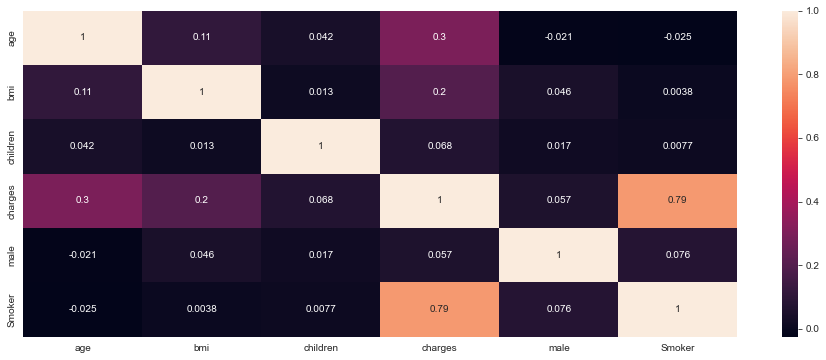

In [55]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(),annot = True)

## Splitting the data

In [101]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [102]:
x

,age,bmi,children,male,Smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [103]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4)

In [105]:
x_train.shape

(802, 5)

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [107]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [108]:
scaled_x_train

array([[-0.79703216,  1.09651256, -0.07883563, -1.01254754, -0.51282758],
       [-1.50743424,  0.97371318, -0.91075898, -1.01254754,  1.94997313],
       [-1.43639403, -0.29734019, -0.91075898, -1.01254754,  1.94997313],
       ...,
       [-0.58391153, -0.34279192, -0.07883563,  0.98760795, -0.51282758],
       [ 0.33961117, -0.16098503,  0.75308772,  0.98760795, -0.51282758],
       [-0.79703216,  0.64199536, -0.91075898, -1.01254754, -0.51282758]])

## Support Vector Regression

In [109]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [110]:
predict = regressor.predict(scaled_x_test)

In [111]:
predict

array([9366.39949407, 9450.1045506 , 9329.25555868, 9320.32964518,
       9421.71486834, 9329.09016648, 9324.10087156, 9460.9568594 ,
       9326.9540507 , 9356.53180913, 9385.26796099, 9313.28300898,
       9345.94653615, 9313.03406769, 9342.7872514 , 9456.41845137,
       9425.51154204, 9358.89724718, 9420.85325584, 9460.37250178,
       9392.58006432, 9323.84193591, 9317.296942  , 9455.71461001,
       9430.25294075, 9324.05434805, 9456.72543055, 9441.1693881 ,
       9310.95091   , 9447.71094595, 9373.71928171, 9453.87140114,
       9381.97391835, 9387.2211666 , 9316.86849539, 9332.54969014,
       9460.58029363, 9462.84497354, 9315.49572973, 9424.63353017,
       9315.486919  , 9413.44573758, 9424.67150518, 9421.03951214,
       9334.56673997, 9429.22046843, 9338.99082554, 9367.75944835,
       9317.75912301, 9380.99668183, 9339.48495649, 9461.08358893,
       9368.59236601, 9322.71900176, 9320.79697989, 9430.07218487,
       9341.32678119, 9457.95636068, 9449.11659145, 9342.27244

In [112]:
y_test

172      1694.79640
1152    40941.28540
703      5385.33790
468     23288.92840
927     12032.32600
           ...     
55      47496.49445
124     10115.00885
940      1121.87390
8        6406.41070
621     40182.24600
Name: charges, Length: 536, dtype: float64

In [113]:
np.mean((y_test - predict)**2)

158399906.10053104

In [84]:
## the error is very high cause we used unwanted parameters as well if we remove the children factor the error will decrease